In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pylab as plt

Prepare funciones en Python que generen dataframes panda ( de longitud dada n ) de acuerdo a las siguientes descripciones:

a) Los datos tienen d inputs, todos valores reales, correspondientes a la posición del punto en un espacio d-dimensional. El output es binario, y corresponde a la clase a la que pertenece el ejemplo. La clase 1 corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el ( 1, 1, 1, .... , 1 ) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d). La clase 0 tiene la misma distribución, pero centrada en el ( -1, -1, -1, .... , -1 ). Se puede encontrar información sobre Gaussianas multidimensionales y el caso especial de una matriz diagonal en http://cs229.stanford.edu/section/gaussians.pdf (secciones 1 y 3). Los parámetros que se deben ingresar a la función son d y n (enteros) y C (real). De los n puntos generados, n/2 deben pertenecer a cada clase.

In [2]:
def gausiandist0(d,n,C):
    
    center = np.ones(d)
    mcov   = np.eye(d)*C*np.sqrt(d)
    
    points = np.random.multivariate_normal(center, mcov, n)

    return points

In [3]:
def gausiandist(d,n,C):
    
    center1 = np.ones(d)
    mcov1   = np.eye(d)*C*np.sqrt(d)
    
    center2 = np.ones(d)*-10
    mcov2   = np.eye(d)*C*np.sqrt(d)
    
    points1 = np.random.multivariate_normal(center1, mcov1, int(n/2))
    points2 = np.random.multivariate_normal(center2, mcov2, int(n/2))
    
    points = np.concatenate([points1,points2])
    #df = pd.DataFrame(points)

    return points

In [4]:
dsa = gausiandist(1,20000,1)

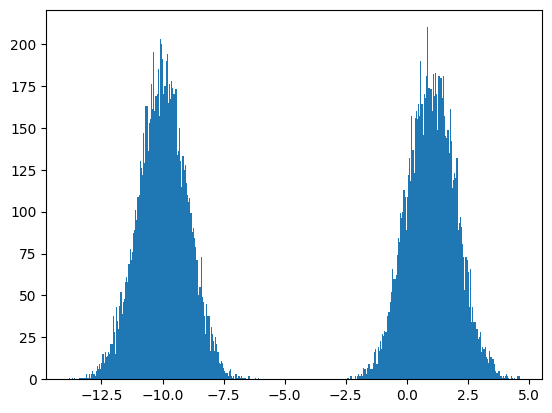

In [5]:
plt.hist(dsa,bins=400)
plt.show()

# Resultado

In [6]:
def gausiandist(d,n,C):
    
    center1 = np.ones(d)
    mcov1   = np.eye(d)*C*np.sqrt(d)
    
    center2 = np.ones(d)*-1
    mcov2   = np.eye(d)*C*np.sqrt(d)
    
    points1 = np.random.multivariate_normal(center1, mcov1, int(n/2))
    points2 = np.random.multivariate_normal(center2, mcov2, int(n/2))
    
    class1 = np.ones(int(n/2))
    class2 = np.ones(int(n/2))*0
    
    clases = np.concatenate([class1,class2])
    
    points = np.concatenate([points1,points2])
    df = pd.DataFrame(points)
    
    df['clases'] = clases.astype(int)

    return df

In [7]:
dist = gausiandist(1,5000,10)


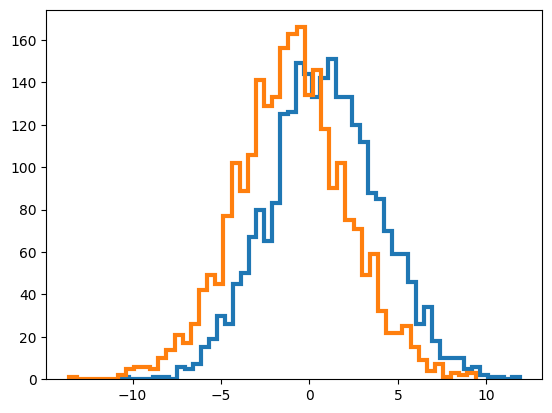

In [8]:
clase1 = dist.loc[dist['clases'] == 1]
clase0 = dist.loc[dist['clases'] == 0]

plt.hist(clase1[0],bins=50,histtype='step',lw=3)
plt.hist(clase0[0],bins=50,histtype='step',lw=3)
plt.show()

b) Igual al punto anterior, pero las distribuciones tienen centro en el ( 1, 0, 0, .... , 0 ) y en el ( -1, 0, 0, .... , 0 ), respectivamente y la desviación estandar es igual a C independientemente de d.

In [9]:
def gausiandist(d,n,C):
    
    center1 = np.zeros(d)
    center1[0] = 1
    mcov1   = C
    
    center2 = np.zeros(d)
    center2[0] = -1
    mcov2   = C
    
    points1 = np.random.multivariate_normal(center1, mcov1, int(n/2))
    points2 = np.random.multivariate_normal(center2, mcov2, int(n/2))
    
    points = np.concatenate([points1,points2])
    df = pd.DataFrame(points)

    return df

c) Espirales anidadas: Los datos tienen 2 inputs, x e y, que corresponden a puntos generados al azar con una distribución UNIFORME (en dicho sistema de referencia x-y) dentro de un circulo de radio 1. El output es binario, correspondiendo la clase 0 a los puntos que se encuentran entre las curvas ro = theta/4pi y ro = (theta + pi)/4pi (en polares) y la clase 1 al resto. De los n puntos generados, n/2 deben pertenecer a cada clase. La siguiente figura es un ejemplo:

In [159]:
#En la figura se ve que la espiral hace dos vueltas, asi que tengo que 
#tirar hasta 4 pi en el angulo,
#y despues tiro random en r**2 porque el diferencial de area va como ~ r^2

In [156]:
def espirales_anidadas(n):

    r2    = np.random.uniform(0, 1, n)
    r = np.sqrt(r2)
    tita = np.random.uniform(-2*np.pi, 4*np.pi, n)
    x = r * np.cos(tita)
    y = r * np.sin(tita)
    
  
    
    sel, = np.where((r > tita/(4*np.pi)) & (r < (tita + np.pi)/(4*np.pi)))
    
    # ---- esto es una chanchada ...
    sel2, = np.where((r > (tita+2*np.pi)/(4*np.pi)) & (r < ((tita+2*np.pi) + np.pi)/(4*np.pi)))
    sel3, = np.where((r > (tita+4*np.pi)/(4*np.pi)) & (r < ((tita+4*np.pi) + np.pi)/(4*np.pi)))
    sel4, = np.where((r > (tita-2*np.pi)/(4*np.pi)) & (r < ((tita-2*np.pi) + np.pi)/(4*np.pi)))
    sel5, = np.where((r > (tita-4*np.pi)/(4*np.pi)) & (r < ((tita-4*np.pi) + np.pi)/(4*np.pi)))
    
    sel = np.concatenate([sel,sel2,sel3,sel4,sel5])
    # ------------------------------
    
    clases = np.ones(n)
    clases[sel] = 0
    
    df = pd.DataFrame({'x' : x, 'y' : y, 'r' : r, 'tita' : tita})
    df['clases'] = clases.astype(int)
    
    return df #x[sel],y[sel]

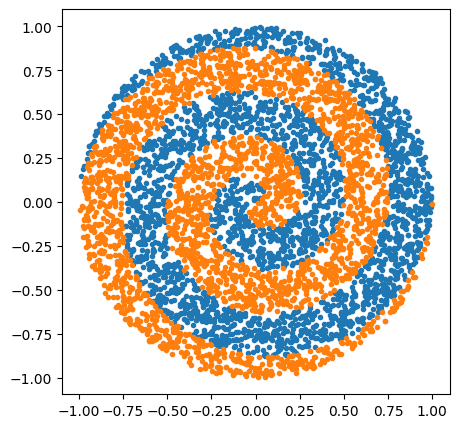

In [157]:
plt.figure(figsize=(5,5))

df = espirales_anidadas(5000)
clase1 = df.loc[df['clases'] == 1]
clase0 = df.loc[df['clases'] == 0]

plt.plot(clase1['x'],clase1['y'],ls='none',marker='o', markersize=3)
plt.plot(clase0['x'],clase0['y'],ls='none',marker='o', markersize=3)

In [95]:
def curva1(tita):
    
    r = tita/(4*np.pi)
    
    return r*np.cos(tita), r*np.sin(tita)

In [96]:
def curva2(tita):
    
    r = (tita+np.pi)/(4*np.pi)
    
    return r*np.cos(tita), r*np.sin(tita)

In [97]:
x,y = curva1(np.linspace(-0,4*np.pi,200))
x2,y2 = curva2(np.linspace(-np.pi,4*np.pi,200))

In [120]:
df = espirales_anidadas(30)


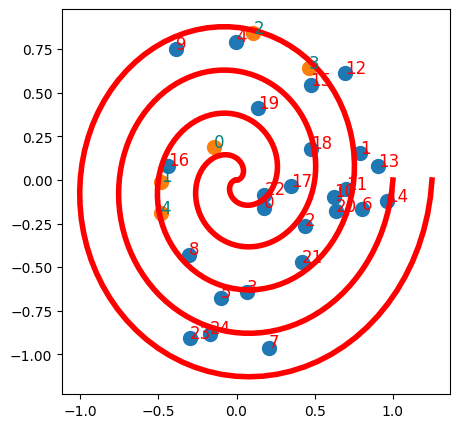

In [124]:
plt.figure(figsize=(5,5))

clase1 = df.loc[df['clases'] == 1]
clase0 = df.loc[df['clases'] == 0]

plt.plot(clase1['x'],clase1['y'],ls='none',marker='o', markersize=10)
plt.plot(clase0['x'],clase0['y'],ls='none',marker='o', markersize=10)

plt.plot(x,y,color='red',lw=4)
plt.plot(x2,y2,color='red',lw=4)

k = 0
for x0, y0 in zip(clase1['x'], clase1['y']):
    plt.text(x0, y0, str(k), color="red", fontsize=12)
    k = k + 1
    
k = 0
for x0, y0 in zip(clase0['x'], clase0['y']):
    plt.text(x0, y0, str(k), color="teal", fontsize=12)
    k = k + 1

In [43]:
np.pi + np.pi/2

4.71238898038469

In [139]:
indice = 4

print('r',clase1['r'].iloc[indice],'tita',clase1['tita'].iloc[indice])
rho = clase1['r'].iloc[indice]
theta = clase1['tita'].iloc[indice] 

lim1 = theta/(4*np.pi)
lim2 = (theta +  np.pi)/(4*np.pi)

print('limites',lim1,lim2)

r 0.7928006127874675 tita -4.711196092502515
limites 0.12509492700150124 0.37509492700150127


In [138]:
indice = 2

print('r',clase0['r'].iloc[indice],'tita',clase0['tita'].iloc[indice])
rho = clase0['r'].iloc[indice]
theta = clase0['tita'].iloc[indice]

lim1 = theta/(4*np.pi)
lim2 = (theta +  np.pi)/(4*np.pi)

print('limites',lim1,lim2)

r 0.8486550299124623 tita 7.726757819271505
limites 0.6148758505055069 0.8648758505055069


In [4]:
(0.1 * 0.2)/(0.1 + 0.32)

0.04761904761904762

In [6]:
0.58*0.1

0.057999999999999996